In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('../data/processed/data.csv')

In [47]:
df.shape

(8807, 8)

In [48]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Royal Enfield Bullet Electra 350cc 2011,2011,38998.0,first,bangalore,40.0,19.80,95000.0
1,Jawa Perak 330cc 2020,2020,2000.0,first,bangalore,NaN,30.00,197500.0
2,Hero CD Dawn 100cc 2005,2005,28000.0,first,ghaziabad,72.0,7.00,9000.0
3,KTM Duke 200cc 2012,2012,24561.0,third,bangalore,35.0,25.00,63400.0
4,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,NaN,first,hyderabad,40.0,20.21,130500.0


In [49]:
df.describe()

,model_year,kms_driven,mileage,power,price
count,8807.000000,6447.000000,7764.000000,8320.000000,8.772000e+03
mean,2015.296923,24227.728711,46.468465,18.857073,8.458634e+04
std,3.780764,30137.639084,16.616913,8.860959,7.774293e+04
min,1950.000000,0.000000,5.000000,7.000000,2.000000e+03
25%,2014.000000,9500.000000,35.000000,14.000000,4.000000e+04
50%,2016.000000,18000.000000,40.000000,19.000000,7.000000e+04
75%,2018.000000,30000.000000,58.000000,21.000000,1.150000e+05
max,2021.000000,1000000.000000,104.000000,197.300000,3.000000e+06


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [50]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [51]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
8684,Bajaj Avenger 220cc 2015,2015,17000.0,second,bangalore,40.0,19.0,65000.0,Bajaj
3316,Royal Enfield Thunderbird 500cc 2017,2017,6100.0,first,delhi,25.0,27.2,160000.0,Royal
5205,Honda CBF Stunner 125cc 2012,2012,NaN,first,faridabad,65.0,11.0,30000.0,Honda
7327,Bajaj Discover 125cc Disc 2018,2018,10000.0,first,delhi,65.0,10.9,45000.0,Bajaj
5229,Royal Enfield Bullet 350cc KS EFI Black BS6 2020,2020,NaN,first,ahmedabad,37.0,19.8,165000.0,Royal


In [52]:
df.brand.value_counts()

Bajaj               2488
Royal               1964
Hero                 997
Yamaha               893
TVS                  675
Honda                623
KTM                  591
Suzuki               256
UM                   135
Jawa                  54
Mahindra              38
Harley-Davidson       34
Hyosung               14
Husqvarna             13
Benelli                7
Kawasaki               7
BenelliImperiale       6
Fb                     4
Ducati                 3
Triumph                2
BMW                    1
yamaha                 1
MV                     1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [53]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [54]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
5760,Bajaj Pulsar NS160 Rear Disc ABS 2019,2019,500.0,first,delhi,NaN,NaN,100000.0,Bajaj,None
1895,Royal Enfield Classic 350cc 2013,2013,20000.0,first,madurai,35.0,19.8,97000.0,Royal,350
5270,Royal Enfield Classic 350cc 2015,2015,23000.0,first,bhubaneshwar,35.0,19.8,115000.0,Royal,350
7375,Royal Enfield Bullet 350cc 2016,2016,23544.0,first,gurgaon,37.0,19.8,90000.0,Royal,350
411,Honda CB Shine 125cc 2011,2011,NaN,first,vadodara,65.0,10.0,25000.0,Honda,125


### We can now drop the model_name feature

In [55]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [56]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [57]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [58]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [59]:
df.owner.unique()

array(['first', 'third', 'second', 'fourth'], dtype=object)

In [60]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [61]:
df.location.value_counts()[:10]

delhi        1583
mumbai        882
bangalore     843
pune          423
chennai       401
hyderabad     373
gurgaon       356
jaipur        351
ahmedabad     300
faridabad     189
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [62]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'mumbai', 'bangalore', 'pune', 'chennai'], dtype='object')


In [63]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [64]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 23


Bajaj     2488
Royal     1964
Hero       997
Yamaha     893
TVS        675
Honda      623
KTM        591
Suzuki     256
UM         135
Jawa        54
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [65]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [66]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [67]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [68]:
df.sample(4)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
5619,37000.0,first,other,35.0,19.8,124300.0,Royal Enfield,350,5
4245,22500.0,first,other,57.0,11.8,43000.0,Bajaj,150,3
6817,28000.0,first,other,53.0,19.0,22000.0,Bajaj,200,12
6165,20000.0,first,delhi,45.0,17.0,32000.0,Bajaj,180,8


# Outlier Detection

In [69]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

# box_plot(df)

## kms_driven

In [70]:
# max_val = df['kms_driven'].quantile(.99)

# min_val = df['kms_driven'].quantile(.1)

# df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

In [71]:
df.shape

(8807, 9)

<AxesSubplot:>

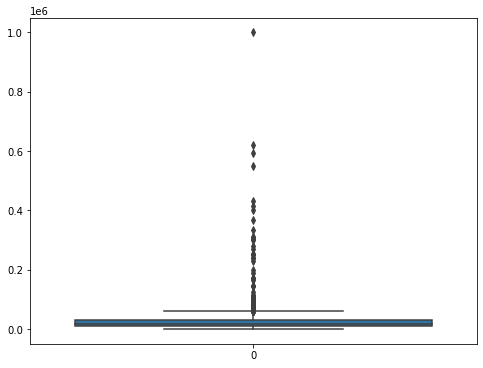

In [72]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [73]:
max_val = df['mileage'].quantile(.99)

min_val = df['mileage'].quantile(.1)

df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

<AxesSubplot:ylabel='mileage'>

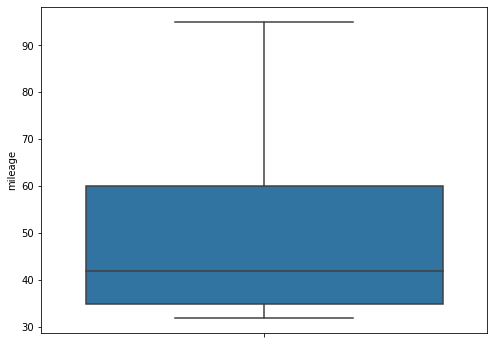

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

## Power

In [75]:
# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

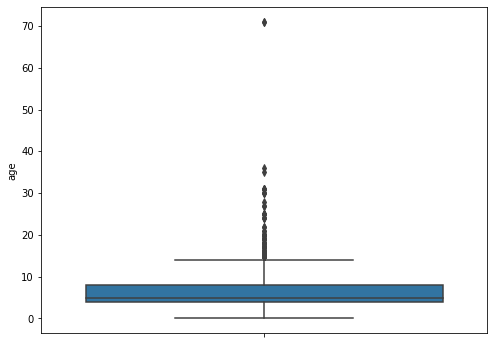

In [76]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [77]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
6945,43509.0,first,delhi,40.0,17.0,20000.0,Hero,223,13
7707,5935.0,first,other,35.0,24.6,121100.0,KTM,200,4
4391,43400.0,first,pune,65.0,NaN,35000.0,Hero,150,9


In [78]:
df = df[df['age'] <= 20]

In [79]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
2606,6000.0,first,mumbai,40.0,19.8,140000.0,Royal Enfield,350,6
4832,NaN,first,other,35.0,24.5,110000.0,Bajaj,None,3
490,22000.0,second,mumbai,40.0,19.0,36814.0,Bajaj,220,7


<AxesSubplot:ylabel='age'>

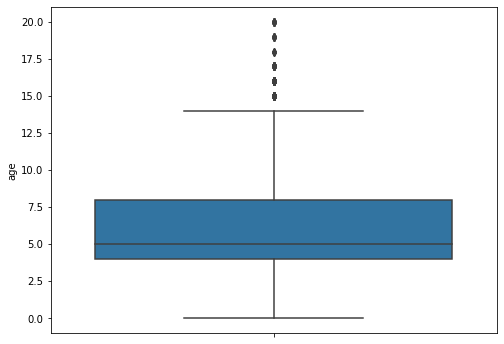

In [80]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [81]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

<AxesSubplot:ylabel='price'>

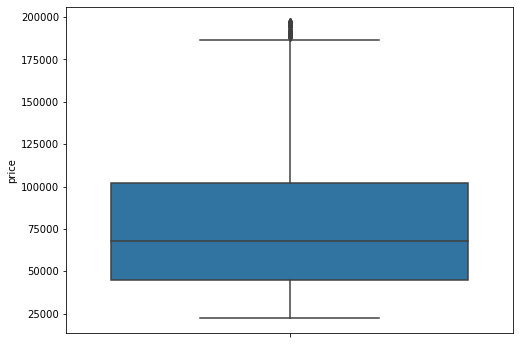

In [82]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [83]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
8194,800.0,first,mumbai,65.0,NaN,58000.0,Hero,150,5
8310,NaN,second,other,37.0,19.8,94000.0,Royal Enfield,350,6
5253,NaN,first,mumbai,35.0,24.5,70000.0,Bajaj,None,5
376,NaN,first,other,42.0,23.2,45700.0,Bajaj,None,6
7477,NaN,first,delhi,60.0,15.2,55000.0,TVS,160,4


In [84]:
df.shape

(6100, 9)

In [85]:
df.isnull().sum()

kms_driven    1850
owner            0
location         0
mileage          0
power          153
price            0
brand            0
engine        1484
age              0
dtype: int64

In [86]:
# fill price with mean
df.price.fillna(df.price.mean(),inplace=True)

In [87]:
df.shape

(6100, 9)

## Save

In [88]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)